In [161]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [163]:
RANDOM_SEED = 42

In [164]:
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [165]:
df = pd.read_csv('./cherry-blossoms.csv', index_col='Years', usecols=['Years', 'Yoshino peak bloom date'])

In [166]:
df.head()

,Yoshino peak bloom date
Years,
1921,79
1922,97
1923,99
1924,104
1925,86


In [167]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train,test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [168]:
def create_dataset(X,y,Tx=1):
    Xs, ys = [], []
    for i in range(len(X) - Tx):
        v = X.iloc[i:(i+Tx)].values
        Xs.append(v)
        ys.append(y.iloc[i + Tx])
    return np.array(Xs), np.array(ys)   

In [169]:
Tx = 10
X_train, y_train = create_dataset(train, train['Yoshino peak bloom date'], Tx)
X_test, y_test = create_dataset(test, test['Yoshino peak bloom date'], Tx)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(66, 10, 1) (66,)
(10, 10, 1) (10,)


In [113]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [118]:
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=8,
    shuffle=False,
    validation_data=(X_test, y_test)
)

===========] - 0s 998us/sample - loss: 46.7598 - val_loss: 51.2822
Epoch 62/250
66/66 [==============================] - 0s 988us/sample - loss: 46.7347 - val_loss: 51.2863
Epoch 63/250
66/66 [==============================] - 0s 989us/sample - loss: 46.7108 - val_loss: 51.2922
Epoch 64/250
66/66 [==============================] - 0s 984us/sample - loss: 46.6874 - val_loss: 51.2968
Epoch 65/250
66/66 [==============================] - 0s 977us/sample - loss: 46.6645 - val_loss: 51.2971
Epoch 66/250
66/66 [==============================] - 0s 1ms/sample - loss: 46.6414 - val_loss: 51.2896
Epoch 67/250
66/66 [==============================] - 0s 991us/sample - loss: 46.6178 - val_loss: 51.2730
Epoch 68/250
66/66 [==============================] - 0s 969us/sample - loss: 46.5935 - val_loss: 51.2476
Epoch 69/250
66/66 [==============================] - 0s 973us/sample - loss: 46.5686 - val_loss: 51.2182
Epoch 70/250
66/66 [==============================] - 0s 1ms/sample - loss: 46.5432 - v

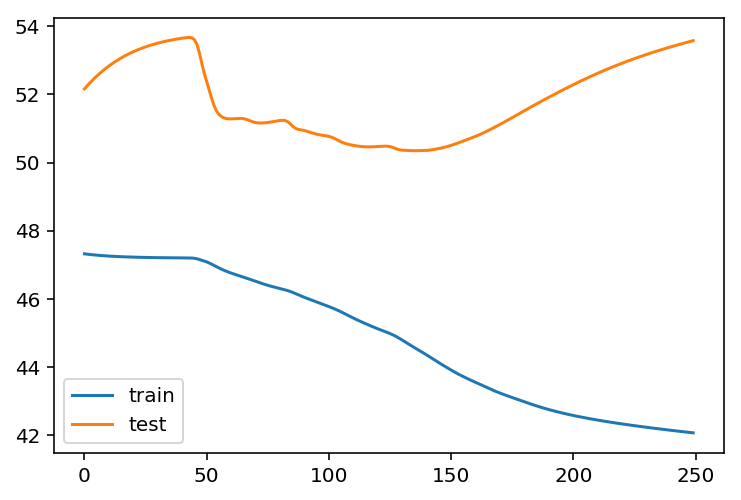

In [119]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [120]:
y_pred = model.predict(X_test)

In [142]:
df.index.to_series

<bound method Index.to_series of Int64Index([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
            1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
            1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
            1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
            1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
            1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Years')>

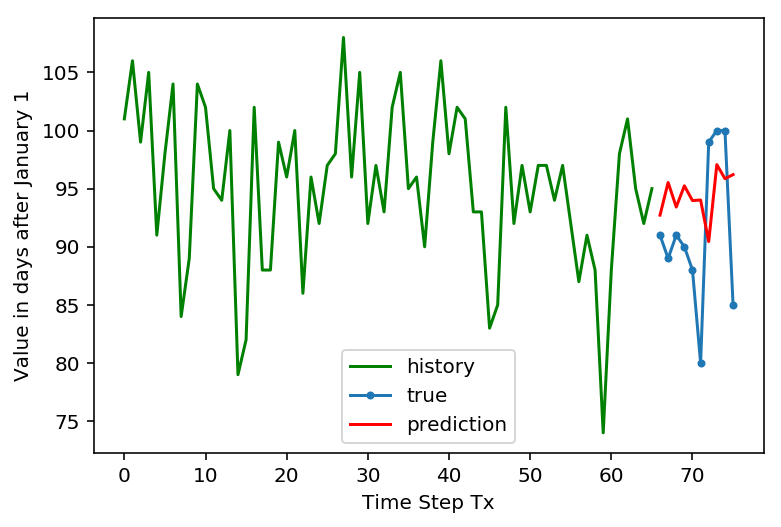

In [160]:
# put the loss in context
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value in days after January 1')
plt.xlabel('Time Step Tx')
plt.legend()
plt.show()